In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
vechicle_df=pd.read_csv('DS1_C9_S6_Practice_Vehicle_Data.csv')
vechicle_df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
vechicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Vehicle_type       157 non-null    object 
 3   Engine_size        156 non-null    float64
 4   Horsepower         156 non-null    float64
 5   Wheelbase          156 non-null    float64
 6   Width              156 non-null    float64
 7   Length             156 non-null    float64
 8   Curb_weight        155 non-null    float64
 9   Fuel_capacity      156 non-null    float64
 10  Fuel_efficiency    154 non-null    float64
 11  Latest_Launch      157 non-null    object 
 12  Power_perf_factor  155 non-null    float64
dtypes: float64(9), object(4)
memory usage: 16.1+ KB


In [4]:
vec_num=vechicle_df.select_dtypes(exclude='object')
vec_num

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [5]:
vec_num.isnull().sum()

Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Power_perf_factor    2
dtype: int64

In [6]:
for i in vec_num:
    vec_num[i]=vec_num[i].fillna(vec_num[i].mean())
    

In [7]:
vec_num.isnull().sum()

Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Power_perf_factor    0
dtype: int64

<Axes: >

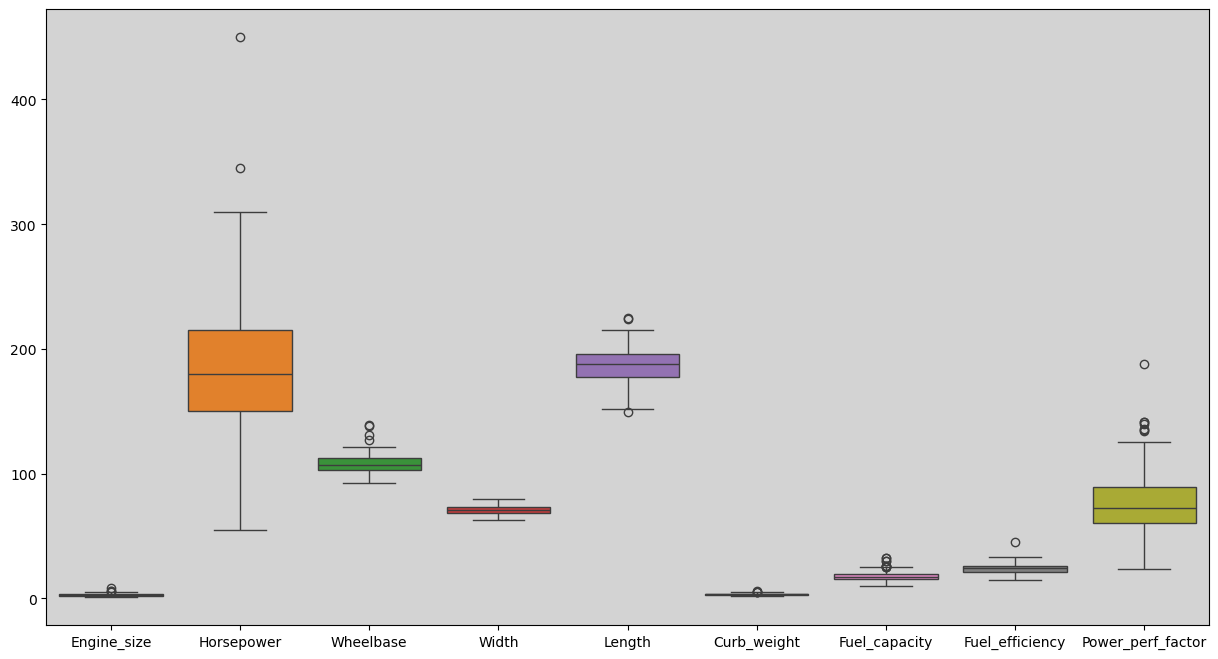

In [8]:
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('lightgrey')
sns.boxplot(data=vec_num)


In [9]:
def iqr_wins(df):
    df_out=df
    col_to_treat=df_out.columns
    for col in col_to_treat:
        q1=df_out[col].quantile(0.25)
        q3=df_out[col].quantile(0.75)
        iqr=q3-q1
        uf=q3+1.5*iqr
        lf=q1-1.5*iqr
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out

In [10]:
treated_df=iqr_wins(vec_num)
treated_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


<Axes: >

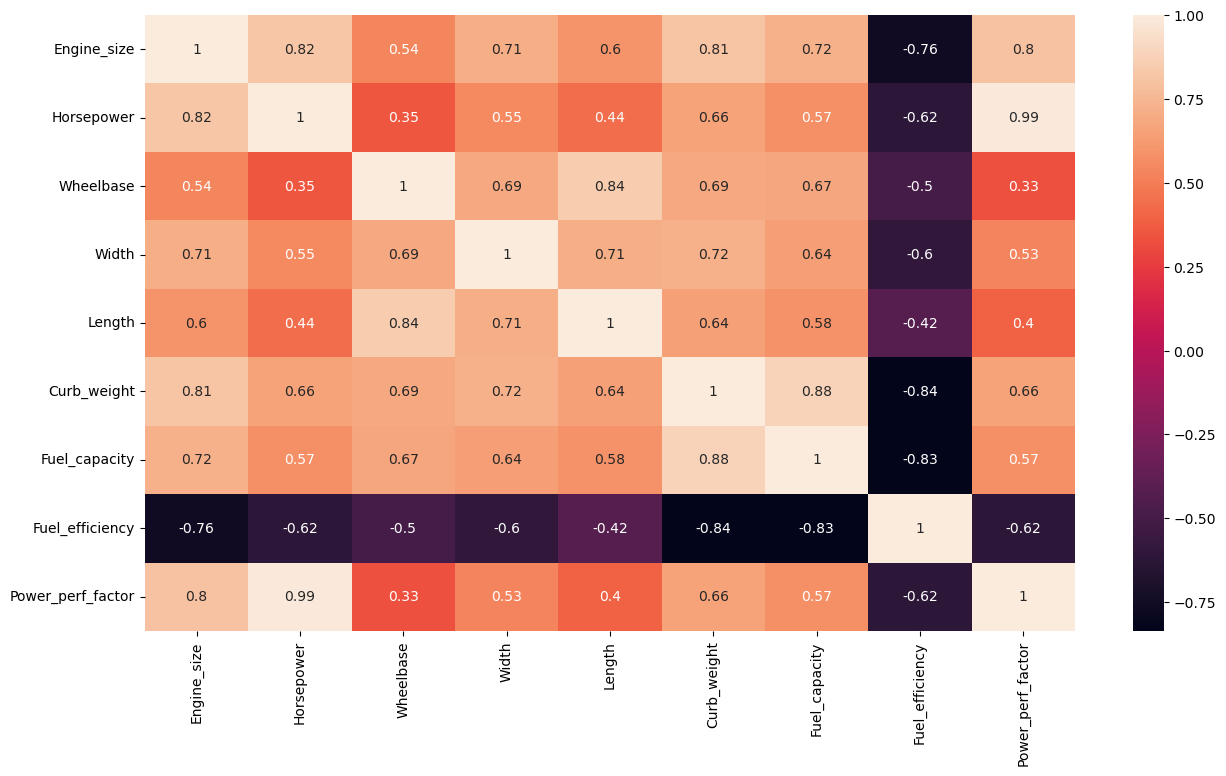

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(treated_df.corr(),annot=True)

In [12]:
treated_df=treated_df.drop(['Fuel_efficiency','Power_perf_factor'],axis=1)
treated_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4
...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5


In [13]:
scaler=StandardScaler()
scale=scaler.fit_transform(treated_df)
scaled_df=pd.DataFrame(scale,columns=treated_df.columns)
scaled_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity
0,-1.286724,-0.852221,-0.878521,-1.122510,-1.121607,-1.226153,-1.351619
1,0.168414,0.762340,0.117309,-0.247827,0.417403,0.250315,-0.170495
2,0.168414,0.762340,-0.055879,-0.160359,0.349837,0.171279,-0.170495
3,0.480229,0.477418,1.055409,0.072890,0.695176,0.810297,0.065729
4,-1.286724,-0.662272,-0.676468,-0.860105,-0.701195,-0.622449,-0.406720
...,...,...,...,...,...,...,...
152,-1.182785,-0.472324,-0.979547,-1.035041,-0.806298,-0.548457,-0.583889
153,-0.663093,-0.320365,-0.344525,-0.539388,-0.108113,-0.269307,0.036201
154,-0.663093,-0.320365,-0.344525,-0.539388,-0.085590,-0.183544,0.036201
155,-0.767032,0.971284,-0.344525,0.102046,-0.123127,0.391572,0.213370


In [14]:
KMeans_model=KMeans(n_clusters=2)
KMeans_model.fit(scaled_df)

KMeans(n_clusters=2)

In [15]:
centroid=KMeans_model.cluster_centers_
centroid

array([[-0.76560791, -0.668257  , -0.72134691, -0.7542641 , -0.71039884,
        -0.81205791, -0.71818094],
       [ 0.66534973,  0.58074715,  0.62688481,  0.65549142,  0.61737042,
         0.705717  ,  0.62413343]])

In [16]:
label=KMeans_model.labels_
label

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

Text(0.5, 1.0, 'elbow_method')

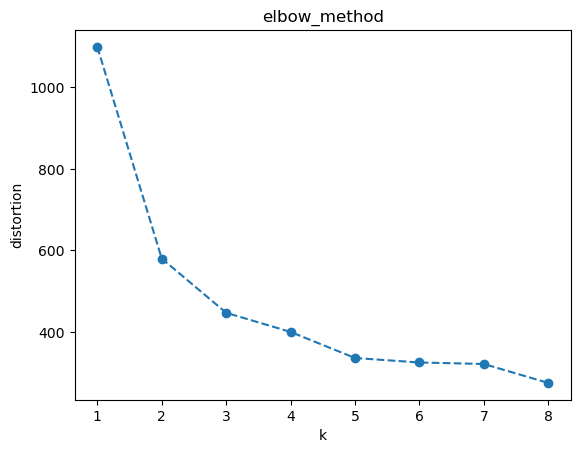

In [17]:
distortion=[]
for i in range(1,9):
    KMean_model=KMeans(n_clusters=i)
    KMean_model.fit(scaled_df)
    distortion.append(KMean_model.inertia_)

plt.plot(range(1,9),distortion,ls='--',marker='o')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('elbow_method')

In [18]:
from sklearn.metrics import silhouette_samples,silhouette_score

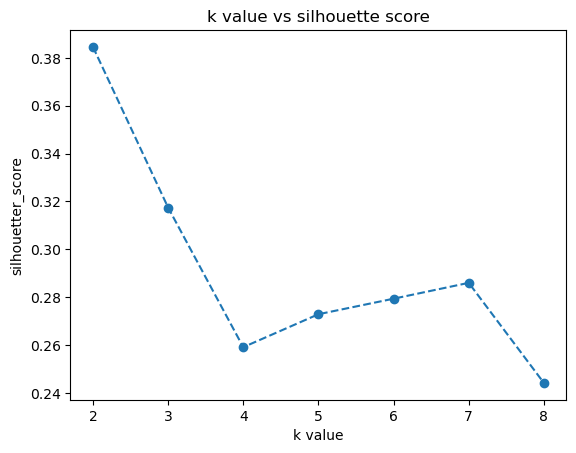

In [19]:
n_cluster=range(2,9)
score=[]
for i in n_cluster:
    score.append(silhouette_score(scaled_df,KMeans(n_clusters=i,random_state=10).fit_predict(scaled_df)))
plt.plot(range(2,9),score,linestyle='--',marker='o')
plt.xlabel('k value')
plt.ylabel('silhouetter_score')
plt.title('k value vs silhouette score') 
plt.show()

In [20]:
K_model=KMeans(n_clusters=2)
K_model.fit(scaled_df)

KMeans(n_clusters=2)

In [21]:
K_model.cluster_centers_

array([[-0.74877227, -0.64173737, -0.6998721 , -0.72378028, -0.72305728,
        -0.81285888, -0.73152925],
       [ 0.6675801 ,  0.57215139,  0.62398235,  0.64529808,  0.64465348,
         0.72471756,  0.6522068 ]])

In [22]:
labels_1=K_model.labels_
labels_1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

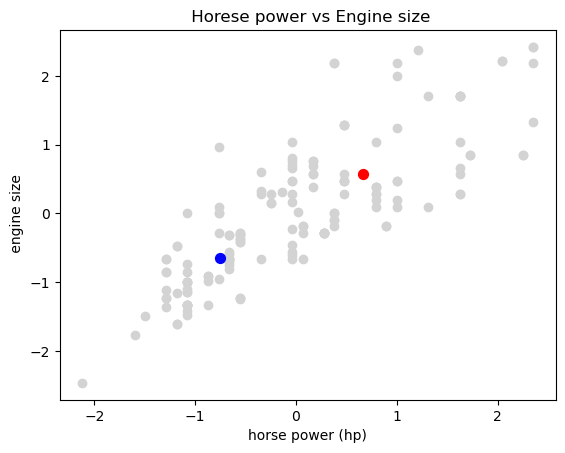

In [23]:
plt.scatter(scaled_df['Engine_size'],scaled_df['Horsepower'],c='lightgrey')
plt.scatter(0.6675801,0.57215139,c='red',s=50)
plt.scatter(-0.74877227,-0.64173737,c='blue',s=50)
plt.xlabel('horse power (hp)')
plt.ylabel(' engine size')
plt.title(' Horese power vs Engine size')
plt.show()

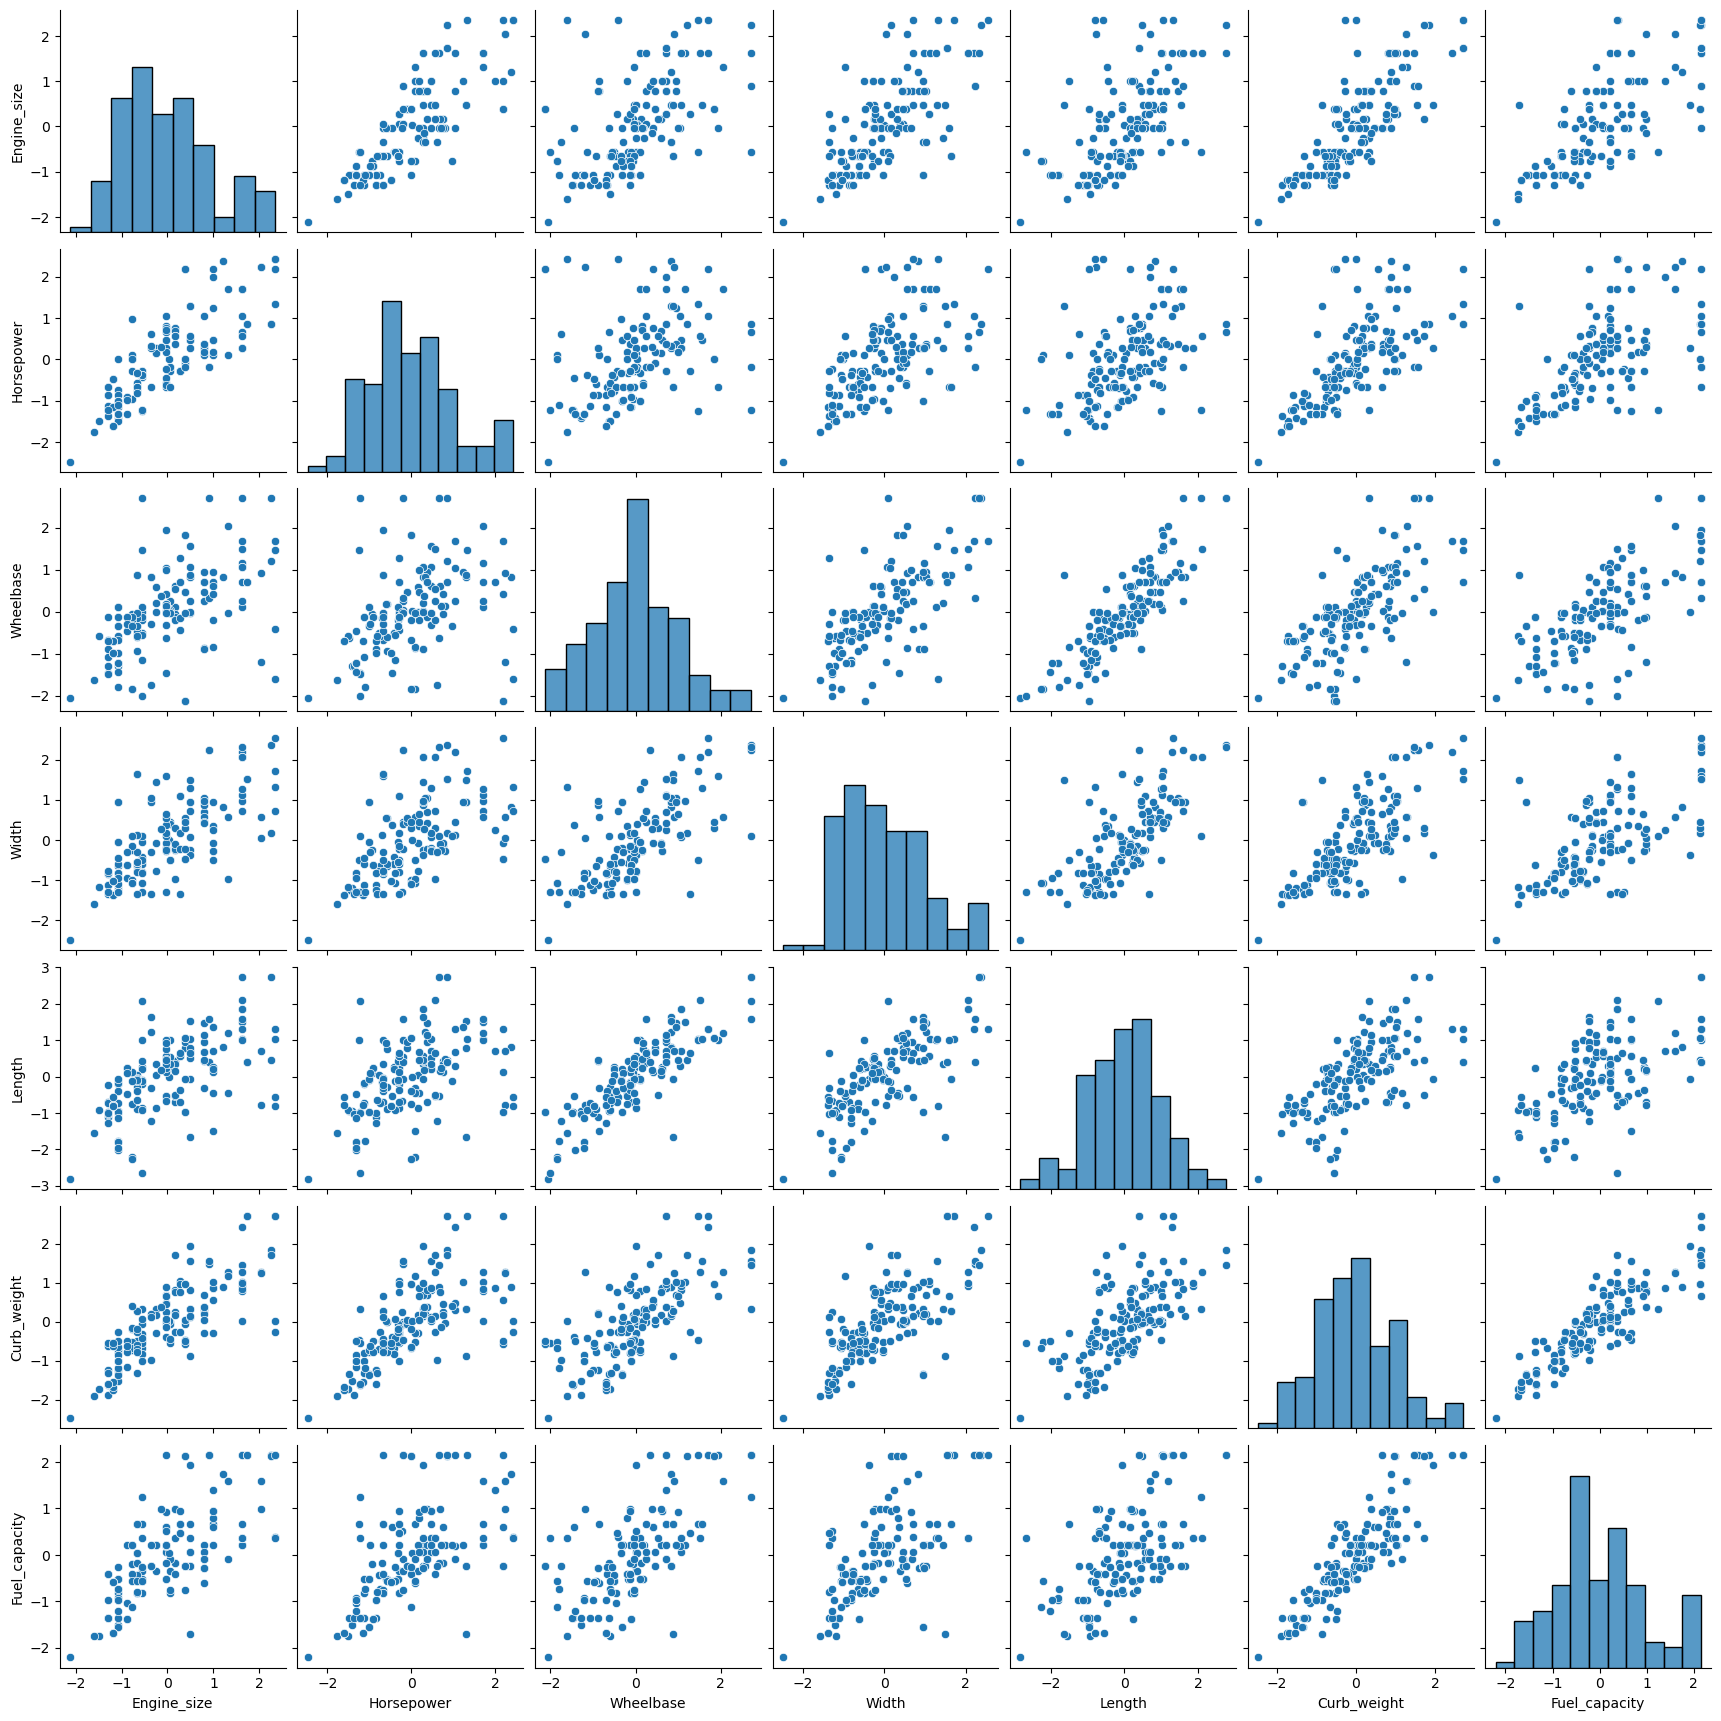

In [24]:
sns.pairplot(data=scaled_df,kind='scatter')
plt.show()

In [25]:
label_df=pd.DataFrame({'label':labels_1})
label_df

,label
0,0
1,1
2,1
3,1
4,0
...,...
152,0
153,0
154,0
155,1


In [26]:
df=pd.concat([vechicle_df,label_df],axis=1)
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,label
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,0
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,1
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN,1
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,1
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,0
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,1


In [34]:
df.groupby('label')['Model'].unique()

label
0    [Integra, A4, 323i, 328i, Cavalier, Malibu, Pr...
1    [TL, CL, RL, A6, A8, 528i, Century, Regal, Par...
Name: Model, dtype: object

In [36]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [38]:
ch_index=calinski_harabasz_score(scaled_df,labels_1)
ch_index

138.49081533225143

In [40]:
db_score=davies_bouldin_score(scaled_df,labels_1)
db_score

0.956132899005112

In [44]:
Silhouette_score=silhouette_score(scaled_df,K_model.fit_predict(scaled_df))
Silhouette_score

0.38454462492538427